# <font size="7"> **Assignment-6**</font>
I hope this assignment will give you clarity on how mathematical models like **Multilayer Perceptrons (MLP)** can be made from scratch using **PyTorch** & can be used to solve complex, non-linear geometric problems **without relying on black-box libraries**.

---
# ⚫ **Mission Critical: The Exclusion Zone Protocol**

**Date:** Year 2142  
**Location:** Exoplanet *Kepler-186f*   **Clearance:** IITians

---

### **⚫ The Story**
Humanity has colonized the distant exoplanet *Kepler-186f*. While the surface is habitable, the planet's magnetic core is unstable. The **Global Defense Council (GDC)** has identified a dangerous phenomenon known as the **"Radiation Ring."**

Sensors indicate that the safe zones on the planet follow a peculiar geometry:
* ⚫ **The Core Zone:** Distance $< 2$ km from the colony center (Safe).
* ⚫ **The Outer Wilds:** Distance $> 4$ km from the colony center (Safe).
* ⚫ **The Dead Zone:** The region **between 2 km and 4 km** is flooded with lethal gamma radiation.

Your engineering team has deployed **3,000 sensor drones** across the colony to map this danger. Each drone reports its coordinates $(x, y)$ and a binary label:
* `1`: Radiation Detected (Dead Zone)
* `0`: Safe Zone

 **⚫ The Problem:** The sensors are cheap and prone to interference. Approximately **5%** of the drones are malfunctioning and reporting the wrong safety status (noise). The GDC mainframe is a legacy system that forbids the use of modern "Neural Libraries" (i.e., you cannot use `torch.nn` or `torch.optim`). You must build a **Multi-Layer Perceptron (MLP) from scratch** to filter out the noise and mathematically define the Exclusion Zone boundaries using **PyTorch**. ( Hint: You know this is a binary classification problem, which Loss function would you use?? )

---

### **⚫ Your Objective**

1.  **Initialize the System:** Use your **Group Number** as the random seed. This ensures your team works on a unique sensor distribution pattern.
2.  **Architect the Filter:** Construct a neural network with **3 hidden layers** (16 neurons each) to learn the non-linear "donut" shape of the Dead Zone.
3.  **Manual Calibration:** You cannot use auto-optimizers. You must manually calculate the gradients (Backpropagation) and update the system weights using **Gradient Descent**.
4.  **Verify Integrity:** Split your sensor data (70% training, 30% validation). Prove that your system doesn't just memorize the malfunctioning sensors (overfitting) but actually learns the geometric shape of the Dead Zone.

---

## ⚫ Engineering Constraints (Read Carefully)

**1. Restricted Modules**
*  **Forbidden:** You are strictly forbidden from importing `torch.nn` (Layers/Loss) or `torch.optim` (Optimizers).
*  **Allowed:** `import torch`, `import matplotlib.pyplot`, `import pandas`, `import numpy`, using `sklearn`.


**2. The Mechanics**
* **Forward Pass:** Must be implemented using raw matrix multiplication (`torch.matmul`) and bias addition.
* **Backward Pass:** You **MAY** use `loss.backward()` to compute gradients automatically (Autograd).
* **Optimization:** You **MUST** implement the weight updates manually (Stochastic Gradient Descent).
    > `w_new = w_old - learning_rate * w_old.grad`

**3. Loss Function**
Since `torch.nn` is banned, you must implement **Binary Cross Entropy** manually using basic tensor math.

$$Loss = -\frac{1}{N} \sum_{i=1}^{N} [y_i \cdot \log(\hat{y}_i) + (1-y_i) \cdot \log(1-\hat{y}_i)]$$

* **Note:** Ensure you handle the log of zero (numerical stability) or use `torch.clamp` to avoid `NaN` errors.

**4. Visual Proof:** Your final output must include a Decision Boundary Map showing the "Donut" shape.


---

### ⚫ **The GDC Dashboard (Required Output)**



The Global Defense Council requires visual confirmation that your system is stable before we can upload it to the drone fleet. You must generate a **3-Panel Heads-Up Display (HUD)** containing the following telemetry:

**1. System Error Trajectory (Loss Plot)**
* **Mission:** Plot the **Training Loss** (Blue) vs. **Validation Loss** (Orange) over all epochs.
* **Why:** We need to confirm that the system is actually learning and not just diverging (exploding gradients).

**2. Integrity Check (Accuracy Plot)**
* **Mission:** Plot the **Training Accuracy** vs. **Validation Accuracy**.
* **Why:** If Training Accuracy is high (95%) but Validation Accuracy is low (80%), you have failed to generalize. This is a sign of **Overfitting**—memorizing sensor noise instead of the Radiation Ring.

**3. Geospatial Threat Map (Decision Boundary)**
* **Mission:** Visualize the **Validation Set** on a 2D map.
* **Overlay:** Draw the neural network's **Decision Boundary** (the contours where confidence = 0.5).
* **Why:** The Commander needs to *see* the "Donut" shape. If your boundary looks like a jagged mess, the model is rejected.

---

In [1]:
import torch
import numpy as np
# ===========================================================
# PART 1: Data Generation (The Exclusion Zone)
# ===========================================================

# ⚠️ INSTRUCTION: Replace 1 with your actual Group Number
GROUP_NUMBER = 11

# Set seed for reproducibility
torch.manual_seed(GROUP_NUMBER)
np.random.seed(GROUP_NUMBER)

def generate_data(n_samples=3000):
    """
    Generates 3000 sensor readings for the Kepler-186f Exclusion Zone.
    Shape: Concentric circles (Donut).
    Logic:
      - Dead Zone (1): 2km < distance < 4km
      - Safe Zone (0): distance < 2km OR distance > 4km
    """
    # Generate random coordinates between -5 and 5 km
    X = (torch.rand(n_samples, 2) * 10) - 5

    # Calculate distance from center (radius)
    radius = torch.sqrt(X[:, 0]**2 + X[:, 1]**2)

    # Assign Labels: 1 if inside the Dead Zone, 0 otherwise
    y = ((radius > 2) & (radius < 4)).float().view(-1, 1)

    # Add 5% Noise (Malfunctioning Drones)
    n_noise = int(0.05 * n_samples)
    noise_indices = torch.randperm(n_samples)[:n_noise]
    y[noise_indices] = 1 - y[noise_indices] # Flip labels

    return X, y

# Generate the dataset
X_full, y_full = generate_data(3000)

print(f"Data Generated: {X_full.shape} samples.")
print(f"Target Generated: {y_full.shape} labels.")

Data Generated: torch.Size([3000, 2]) samples.
Target Generated: torch.Size([3000, 1]) labels.


In [ ]:
# ==============================================================================
# Code from here. Best of luckk :)
# ==============================================================================


Stats | Train: torch.Size([2100, 2]) | Val: torch.Size([900, 2])
Initializing System... Calibrating Sensors...
Epoch 0 | Loss: 0.6943 | Val Acc: 47.33%
Epoch 200 | Loss: 0.6787 | Val Acc: 61.67%
Epoch 400 | Loss: 0.6779 | Val Acc: 61.67%
Epoch 600 | Loss: 0.6767 | Val Acc: 61.67%
Epoch 800 | Loss: 0.6739 | Val Acc: 61.67%
Epoch 1000 | Loss: 0.6658 | Val Acc: 61.67%
Epoch 1200 | Loss: 0.6432 | Val Acc: 61.67%
Epoch 1400 | Loss: 0.5780 | Val Acc: 64.00%
Epoch 1600 | Loss: 0.5112 | Val Acc: 76.11%
Epoch 1800 | Loss: 0.4756 | Val Acc: 79.89%
Training Complete. Proceed to Part 4 for Visualization.


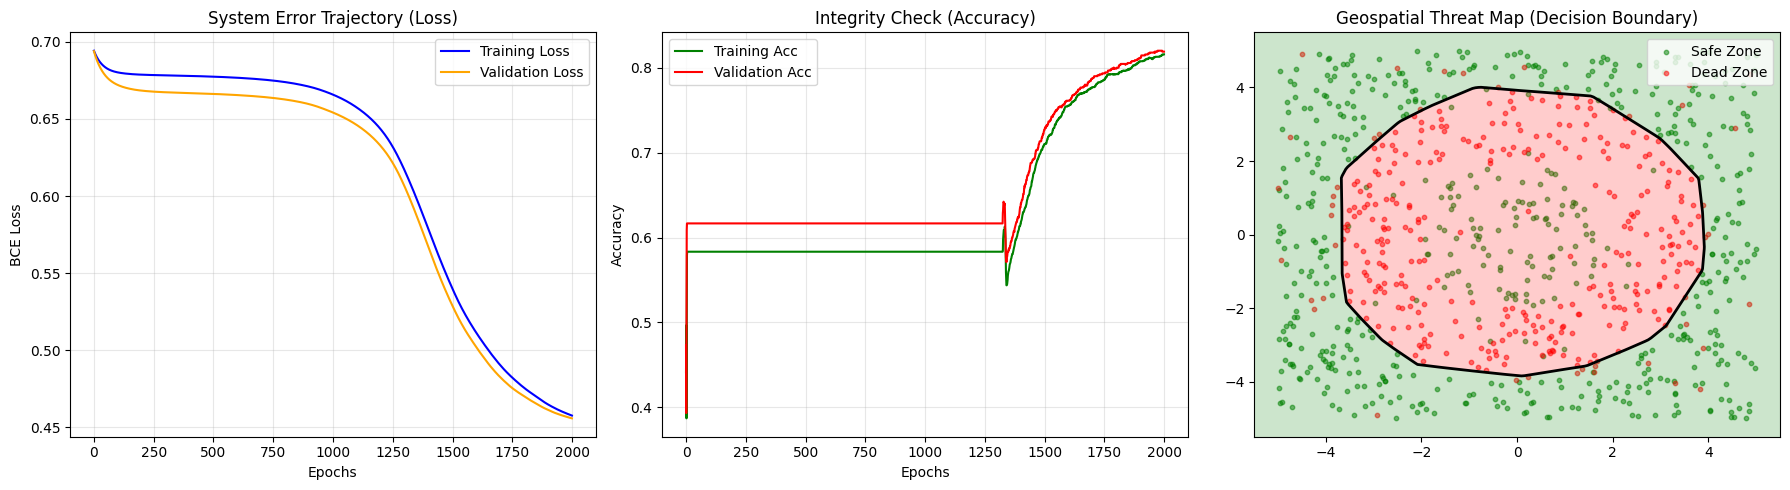

In [5]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


# Split Data (70% Train, 30% Validation) using Sklearn
# We convert to numpy for splitting, then back to torch tensors
X_train_np, X_val_np, y_train_np, y_val_np = train_test_split(
    X_full.numpy(), y_full.numpy(), test_size=0.3, random_state=GROUP_NUMBER
)

# Convert back to FloatTensor
X_train = torch.FloatTensor(X_train_np)
y_train = torch.FloatTensor(y_train_np)
X_val = torch.FloatTensor(X_val_np)
y_val = torch.FloatTensor(y_val_np)

print(f"Stats | Train: {X_train.shape} | Val: {X_val.shape}")

# ===========================================================
# PART 2: The Neural Architecture (Fixed Initialization)
# ===========================================================

# Hyperparameters
INPUT_DIM = 2
HIDDEN_DIM = 16
OUTPUT_DIM = 1
LEARNING_RATE = 0.05
EPOCHS = 2000


def init_param(shape):
    # 1. Create the data (random numbers scaled by 0.1)
    # 2. .requires_grad_(True) tells PyTorch: "This is a Leaf Tensor. Track it."
    return (torch.randn(shape) * 0.1).requires_grad_(True)

# Layer 1
W1 = init_param((INPUT_DIM, HIDDEN_DIM))
b1 = torch.zeros(HIDDEN_DIM, requires_grad=True)

# Layer 2
W2 = init_param((HIDDEN_DIM, HIDDEN_DIM))
b2 = torch.zeros(HIDDEN_DIM, requires_grad=True)

# Layer 3
W3 = init_param((HIDDEN_DIM, HIDDEN_DIM))
b3 = torch.zeros(HIDDEN_DIM, requires_grad=True)

# Output Layer
W4 = init_param((HIDDEN_DIM, OUTPUT_DIM))
b4 = torch.zeros(OUTPUT_DIM, requires_grad=True)

# Pack parameters for the optimizer
params = [W1, b1, W2, b2, W3, b3, W4, b4]

# Activation Functions
def relu(x):
    return torch.maximum(x, torch.tensor(0.0))

def sigmoid(x):
    return 1.0 / (1.0 + torch.exp(-x))

# Forward Pass
def forward(X):
    z1 = torch.matmul(X, W1) + b1
    a1 = relu(z1)

    z2 = torch.matmul(a1, W2) + b2
    a2 = relu(z2)

    z3 = torch.matmul(a2, W3) + b3
    a3 = relu(z3)

    z4 = torch.matmul(a3, W4) + b4
    y_pred = sigmoid(z4)
    return y_pred

# Loss Function
def binary_cross_entropy(y_pred, y_true):
    y_pred = torch.clamp(y_pred, 1e-7, 1 - 1e-7)
    loss = -(y_true * torch.log(y_pred) + (1 - y_true) * torch.log(1 - y_pred))
    return loss.mean()

def calculate_accuracy(y_pred, y_true):
    predicted_classes = (y_pred >= 0.5).float()
    correct = (predicted_classes == y_true).float().sum()
    return correct / y_true.shape[0]

# ===========================================================
# PART 3: The Training Loop (Manual Backprop)
# ===========================================================

train_losses = []
val_losses = []
train_accs = []
val_accs = []

print("Initializing System... Calibrating Sensors...")

for epoch in range(EPOCHS):

    # 1. Forward Pass
    y_pred_train = forward(X_train)
    loss_train = binary_cross_entropy(y_pred_train, y_train)

    # 2. Backward Pass (Autograd)
    # This populates .grad for all Leaf Tensors in 'params'
    loss_train.backward()

    # 3. Manual Optimization (Stochastic Gradient Descent)
    with torch.no_grad(): # Stop tracking computations during update
        for p in params:
            # Now p.grad will NOT be None
            p -= LEARNING_RATE * p.grad

            # Reset gradients manually to zero for the next loop
            p.grad.zero_()

    # 4. Validation & Logging
    with torch.no_grad():
        y_pred_val = forward(X_val)
        loss_val = binary_cross_entropy(y_pred_val, y_val)

        acc_train = calculate_accuracy(y_pred_train, y_train)
        acc_val = calculate_accuracy(y_pred_val, y_val)

    train_losses.append(loss_train.item())
    val_losses.append(loss_val.item())
    train_accs.append(acc_train.item())
    val_accs.append(acc_val.item())

    if epoch % 200 == 0:
        print(f"Epoch {epoch} | Loss: {loss_train.item():.4f} | Val Acc: {acc_val.item()*100:.2f}%")

print("Training Complete. Proceed to Part 4 for Visualization.")



# ===========================================================
# PART 4: The GDC Dashboard (Visualization)
# ===========================================================

plt.figure(figsize=(18, 5))

# Panel 1: System Error Trajectory (Loss)
plt.subplot(1, 3, 1)
plt.plot(train_losses, label='Training Loss', color='blue')
plt.plot(val_losses, label='Validation Loss', color='orange')
plt.title('System Error Trajectory (Loss)')
plt.xlabel('Epochs')
plt.ylabel('BCE Loss')
plt.legend()
plt.grid(True, alpha=0.3)

# Panel 2: Integrity Check (Accuracy)
plt.subplot(1, 3, 2)
plt.plot(train_accs, label='Training Acc', color='green')
plt.plot(val_accs, label='Validation Acc', color='red')
plt.title('Integrity Check (Accuracy)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True, alpha=0.3)

# Panel 3: Geospatial Threat Map (Decision Boundary)
plt.subplot(1, 3, 3)

# 1. Scatter plot of Validation Data
safe_mask = (y_val.squeeze() == 0)
dead_mask = (y_val.squeeze() == 1)

plt.scatter(X_val[safe_mask, 0], X_val[safe_mask, 1], c='green', s=10, alpha=0.5, label='Safe Zone')
plt.scatter(X_val[dead_mask, 0], X_val[dead_mask, 1], c='red', s=10, alpha=0.5, label='Dead Zone')

# 2. Generate Contour Map for Decision Boundary
x_span = np.linspace(-6, 6, 200)
y_span = np.linspace(-6, 6, 200)
xx, yy = np.meshgrid(x_span, y_span)

# Flatten grid to pass through network
grid_tensor = torch.FloatTensor(np.c_[xx.ravel(), yy.ravel()])

with torch.no_grad():
    pred_grid = forward(grid_tensor).reshape(xx.shape)

# Contour plot at 0.5 threshold
plt.contour(xx, yy, pred_grid, levels=[0.5], colors='black', linewidths=2)
plt.contourf(xx, yy, pred_grid, levels=[0, 0.5, 1], colors=['green', 'red'], alpha=0.2)

plt.title('Geospatial Threat Map (Decision Boundary)')
plt.legend(loc='upper right')
plt.xlim(-5.5, 5.5)
plt.ylim(-5.5, 5.5)

plt.tight_layout()
plt.show()